# Proyecto 1 - Series de Tiempo I
### Bruno Martinez - Cristóbal Cancino
### Prof. Ronny Vallejos
### 06 de abril de 2022
---

---
Problema 1
---
Considere la serie ```flu.dat``` que puede ser obtenida en el sitio
http://www.stat.pitt.edu/stoffer/tsa2/tsa2.html.

1. Transforme la serie adecuadamente para observar el efecto de la transformación en la media y la varianza

Se graficarán los datos

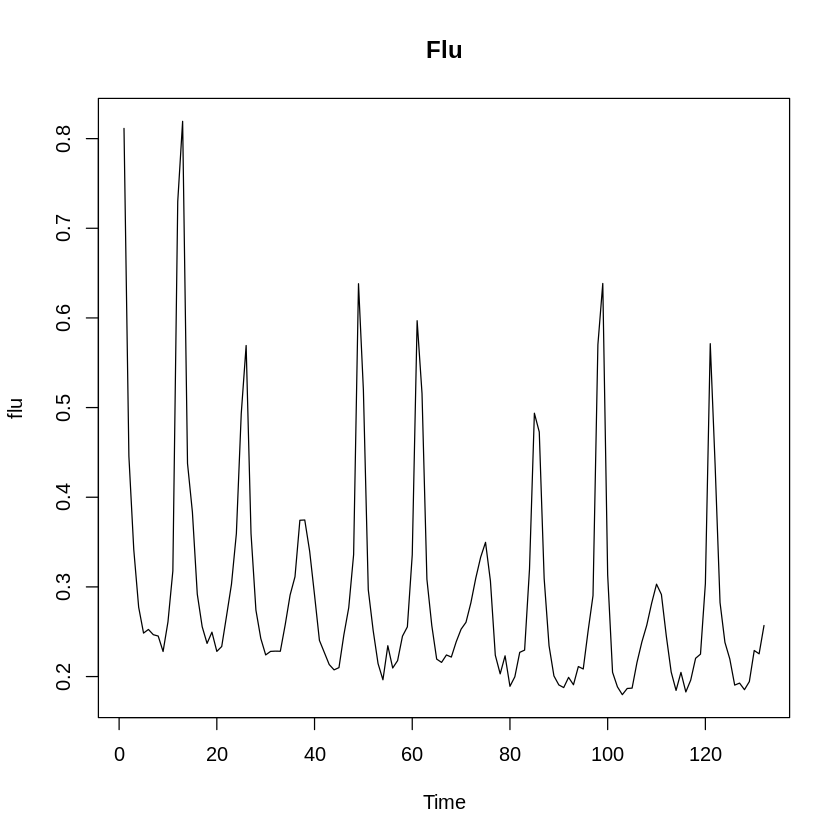

In [1]:
flu <- ts(read.table("https://www.stat.pitt.edu/stoffer/tsa2/data/flu.dat.txt"))
ts.plot(flu, main = 'Flu')

Deseamos estabilizar la varianza, en particular, reducir la dependencia de la variabilidad del tiempo. Para esto, se utilizará la **Transformación de Box-Cox**.

In [ ]:
library("fpp")

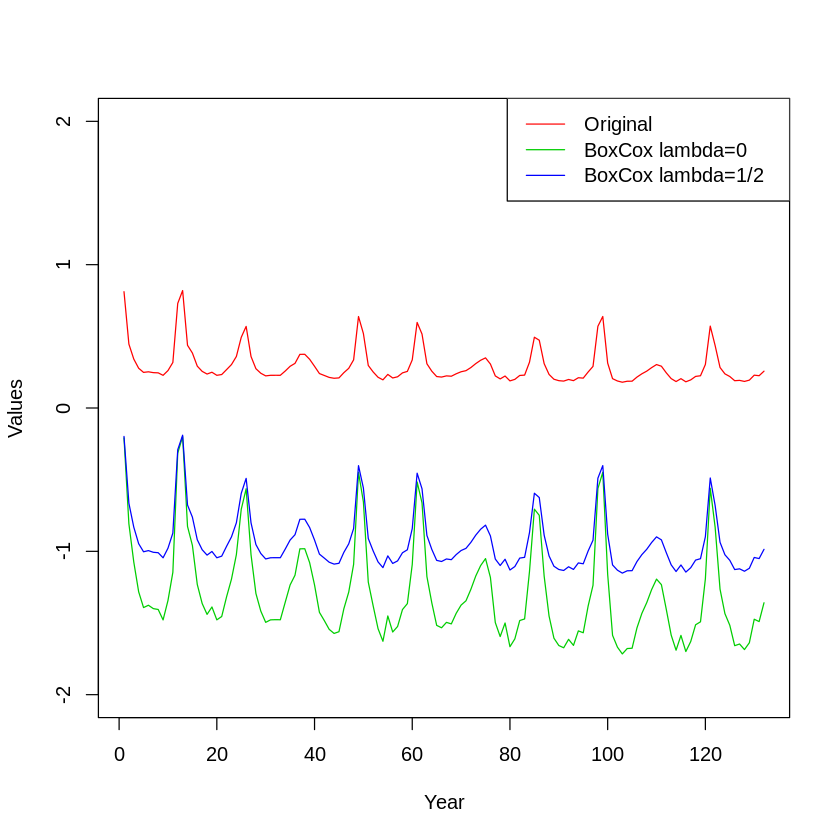

In [3]:
boxcox_flu_0 <- BoxCox(flu, 0)
boxcox_flu_12 <- BoxCox(flu, 1/2)
range <- ts(1:length(flu))
plot(flu, type = "l", col = 2, ylim = c(- 2, 2), xlab = "Year", ylab = "Values")
lines(boxcox_flu_0, type = "l", col = 3)
lines(boxcox_flu_12, type = "l", col = 4)
legend("topright", c("Original", "BoxCox lambda=0", "BoxCox lambda=1/2"), lty = 1, col = 2:4)

2. Se propone un modelo de la forma
    $$Z_t = \sum_{j=0}^{\infty} \beta_j t^j + \epsilon_t$$
donde $\epsilon_t$ es un ruido blanco con varianza $\sigma^2$.
    1. Proponga un método que permita truncar la serie infinita que define el modelo, de tal modo que el modelo resultante sea de la forma
        $$Z_t = \sum_{j=0}^p b_j t^j + u_t,$$
   donde $p \in \mathbb{N}$. Es decir, proponga un método para estimar p.
    2. Estime $p$ usando los datos de la serie ```flu.dat```.
    3. Estime los parámetros del modelo: $\beta_j$, $j = 0,1,...,\hat p$, donde $\hat p$ es la estimación de $p$ propuesta en B.
**Solución.**

Se propone transformar el modelo de la forma
$$Z_t = \sum_{j=0}^\infty \beta_j t^j + \epsilon_t \quad \Rightarrow \quad Z_t = \sum_{j=0}^p \beta_j t^j + \underbrace{\sum_{j=p+1}^\infty \beta_j t^j + \epsilon_t}_{u_t}$$
donde $u_t \approx N(\sum_{j=p+1}^\infty \beta_j t^j,\sigma^2)$. Para estimar $p$, se propone el siguiente método
   
```
p = 1
while True:
    Estimar b_i desde i=0 hasta p con p+1 puntos a través de interpolación de Lagrange
    Si ECM < tol
        break
    p += 1
return p
```

3. Grafique la serie original y la serie ajustada en un mismo gráfico. Hay evidencia para aseverar que el modelo estimado es una buena representación de los patrones de la serie original? Justifique.

4. Ajuste un modelo de descomposición a la serie ```flu.dat```.

In [4]:
flu <- ts(read.table("https://www.stat.pitt.edu/stoffer/tsa2/data/flu.dat.txt"),frequency=12)

```
Se estimará la tendencia a través de un modelo lineal.
```

In [5]:
ma_flu <- rollmean(flu, 13)
range <- ts(1:length(ma_flu))
regression <- lm(ma_flu ~ range)
regression


Call:
lm(formula = ma_flu ~ range)

Coefficients:
(Intercept)        range  
  0.3382540   -0.0007929  


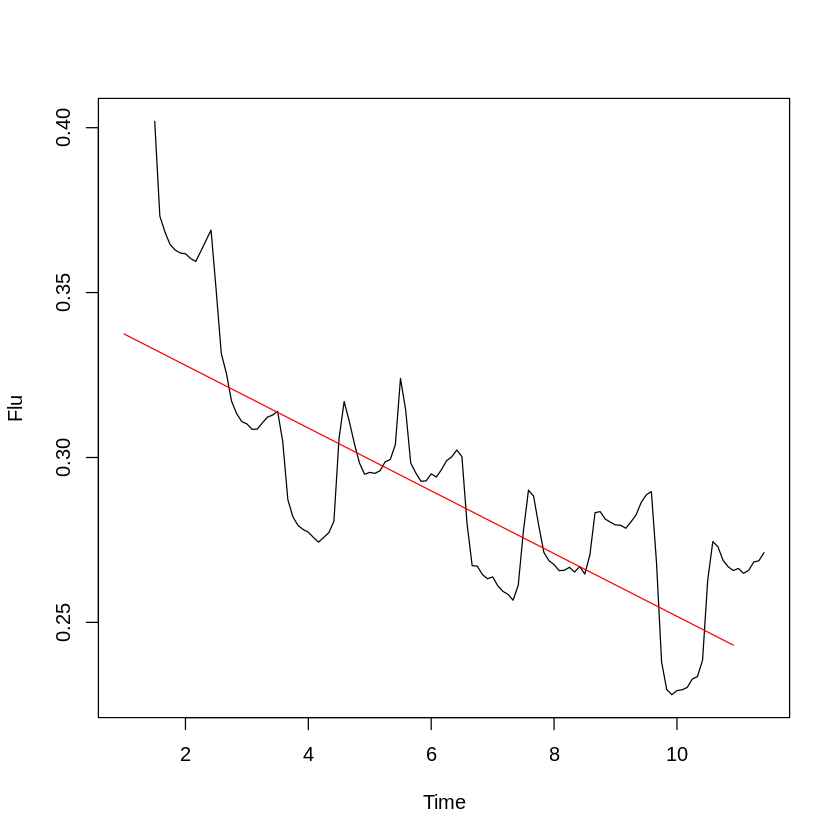

In [6]:
intercept = regression$coefficients["(Intercept)"]
slope = regression$coefficients["range"]
range <- ts(1:length(ma_flu), frequency=12)
trend <- intercept + slope * range
seqplot.ts(ma_flu, trend, ylab="Flu")

```
Estimamos entonces el modelo estacional
```

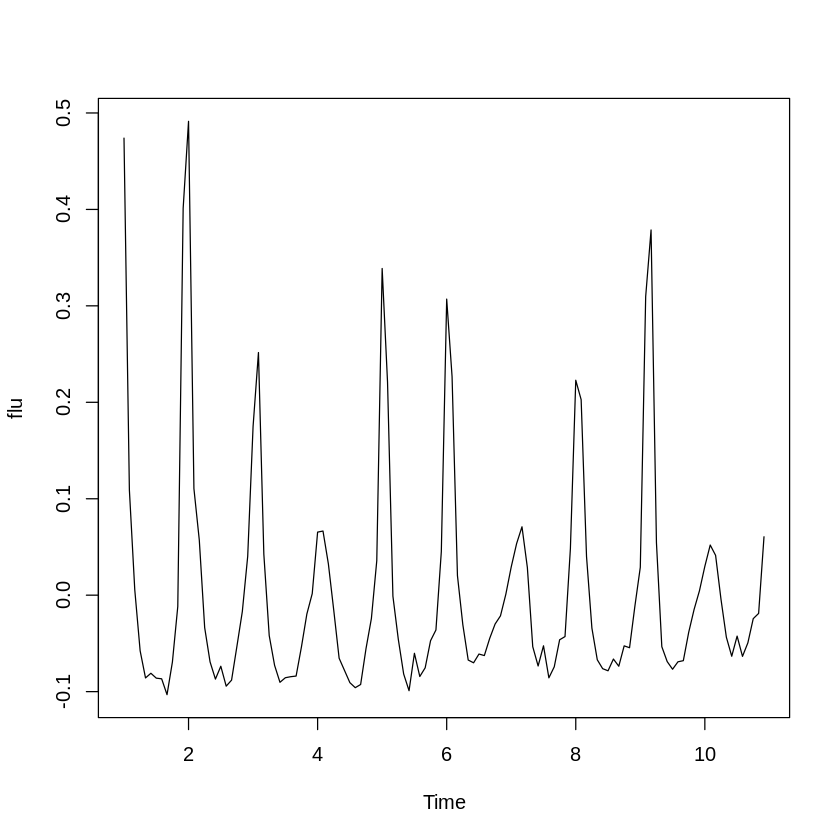

In [7]:
seasonal <- flu - trend
plot(seasonal)

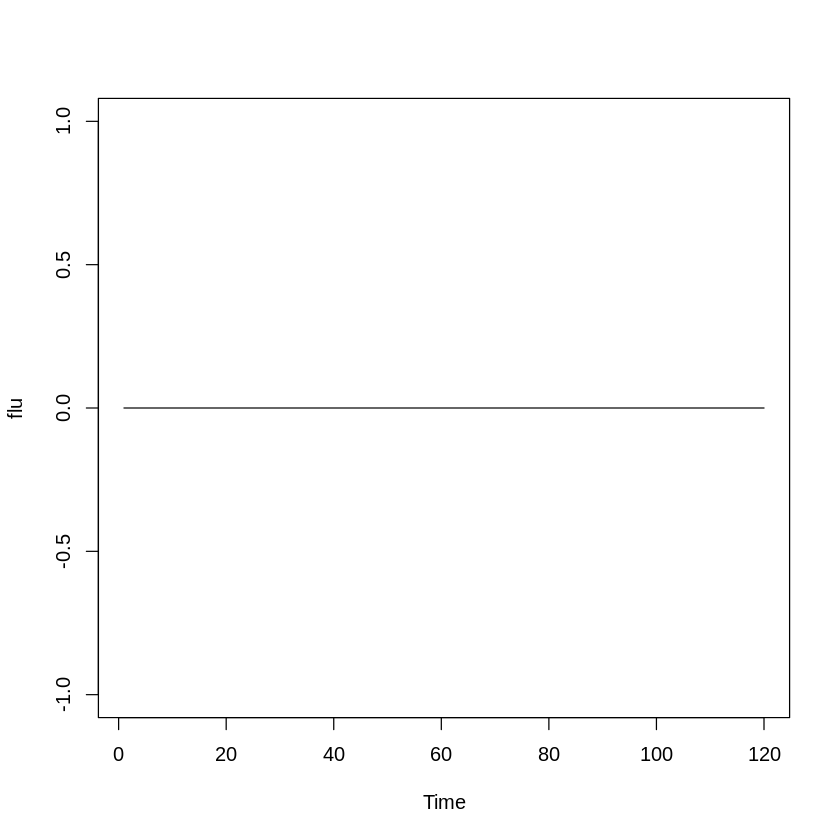

In [8]:
linealmodel <- ts(trend + seasonal)
flu <- ts(read.table("https://www.stat.pitt.edu/stoffer/tsa2/data/flu.dat.txt"))
plot(flu-linealmodel)

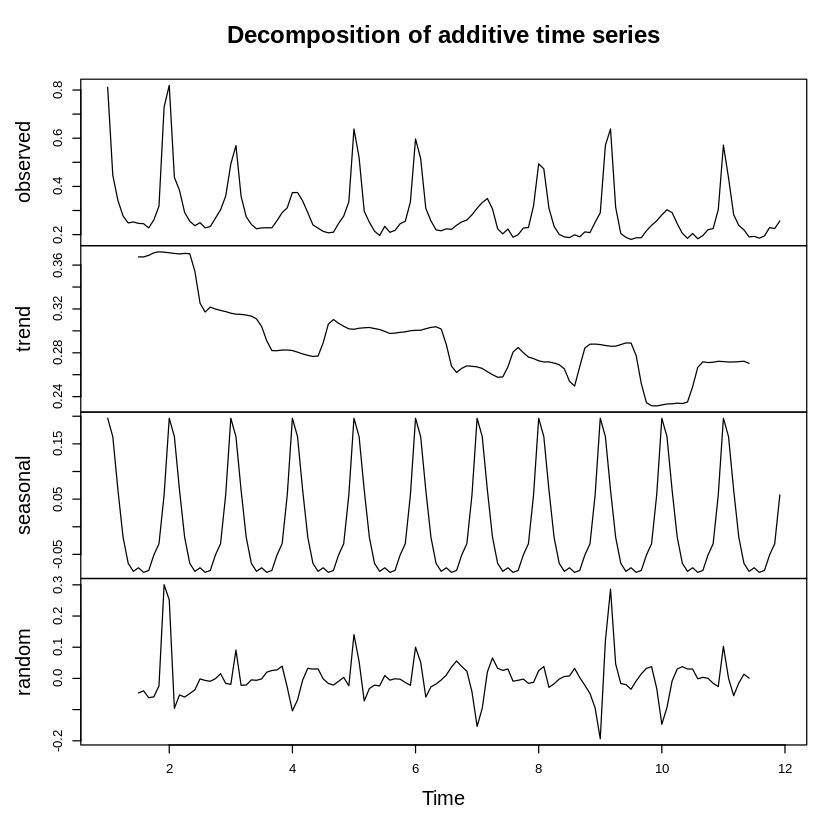

In [9]:
dec_flu <- ts(flu, frequency=12)
dec <- decompose(dec_flu)
plot(dec)

5. Ajuste un modelo de Holt-Winters a la serie ```flu.dat```.

             Length Class  Mode     
fitted       480    mts    numeric  
x            132    ts     numeric  
alpha          1    -none- numeric  
beta           1    -none- numeric  
gamma          1    -none- numeric  
coefficients  14    -none- numeric  
seasonal       1    -none- character
SSE            1    -none- numeric  
call           2    -none- call     

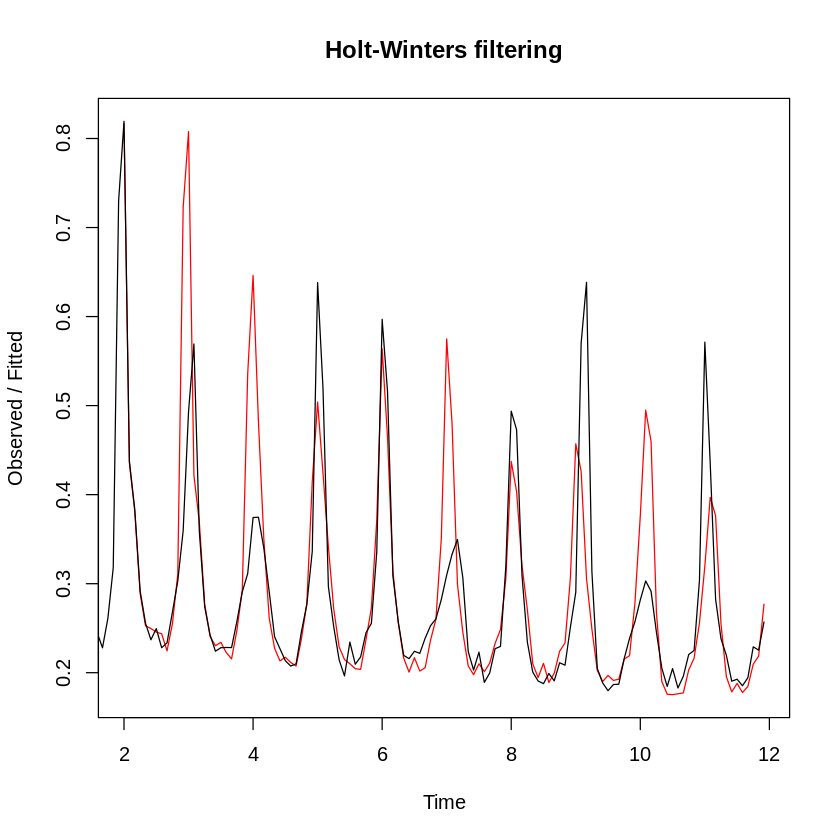

In [10]:
flu <- ts(flu, frequency=12)
hw_flu <- HoltWinters(flu)
plot(hw_flu)
summary(hw_flu)

6. De los modelos propuestos en la parte 2., 4. y 5., ¿cuál es el más apropiado?

---
# Problema 2

En este ejercicio es necesario obtener la serie asociada al calentamiento de la tierra descrito en grados centígrados entre los años 1900-1997. Esta serie es presentada en ```Shumway and Stoffer (2000), página 5```. Para bajar el archivo ```globtemp.dat```, encuentre el sitio web http://www.stat.pitt.edu/stoffer/tsa2/tsa2.html.

1. Grafique la serie ```globtemp.dat``` en el tiempo.

In [11]:
globtemp <- ts(read.table("https://www.stat.pitt.edu/stoffer/tsa2/data/globtemp.dat.txt"))
head(globtemp)

V1
-0.36
-0.48
-0.43
-0.25
-0.39
-0.43


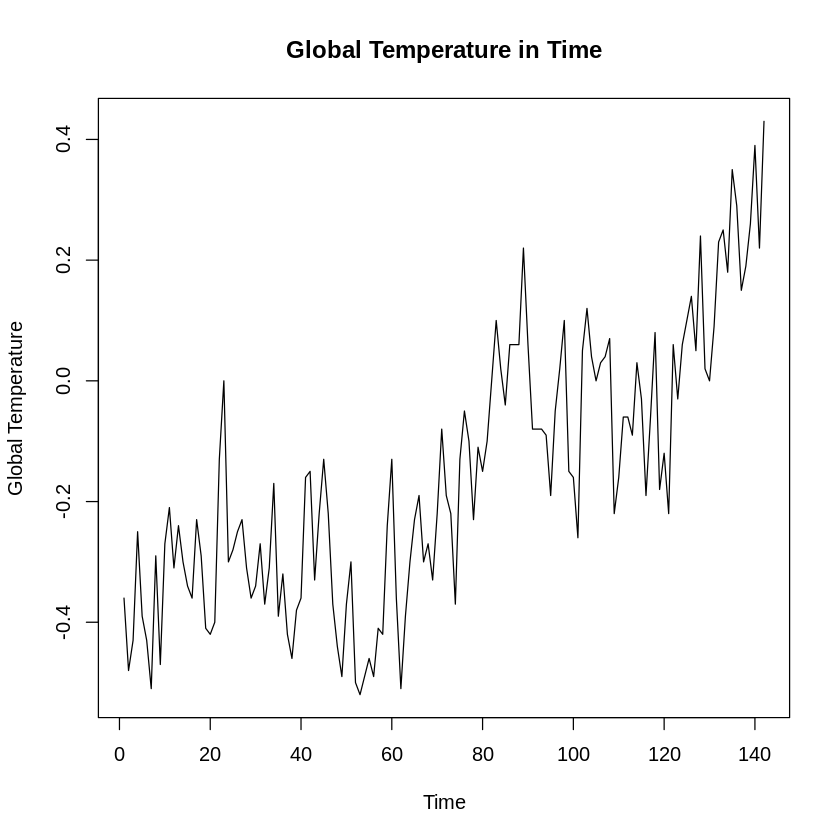

In [12]:
ts.plot(globtemp, main='Global Temperature in Time', ylab="Global Temperature")

2. Use un modelo de suavizamiento exponencial simple para predecir la serie hacia el futuro. Considere un valor apropiado para $\alpha$.

```
Debemos recordar que para utilizar un modelo de suavizamiento exponencial simple, se deben quitar las tendencias. Observe que si no:
```

In [ ]:
library(tidyverse)
library(fpp2)

In [14]:
length(globtemp)

[1] 142

In [15]:
globtemp.train <- window(globtemp, end = 100)
globtemp.test <- window(globtemp, start = 101)

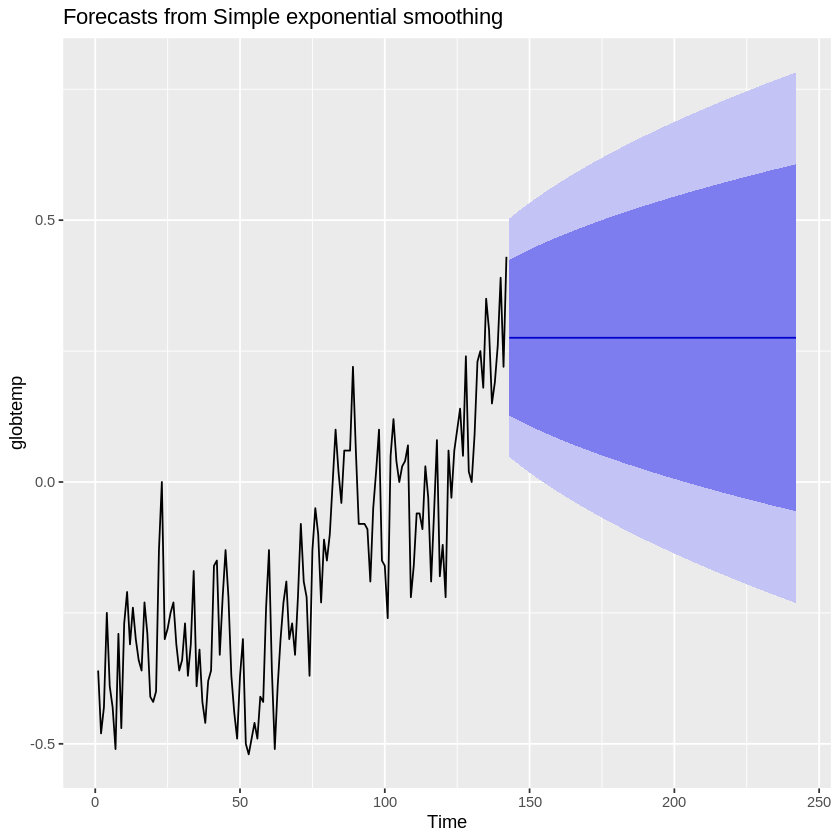

In [16]:
ses_globtemp <- ses(globtemp, alpha = .2, h = 100)
autoplot(ses_globtemp)

```
Observamos que no está capturando la tendencia correctamente. Esto es porque el Suavizamiento Exponencial Simple requiere que los datos no tengan tendencia. Para esto, podemos utilizar el comando ```diff```
```

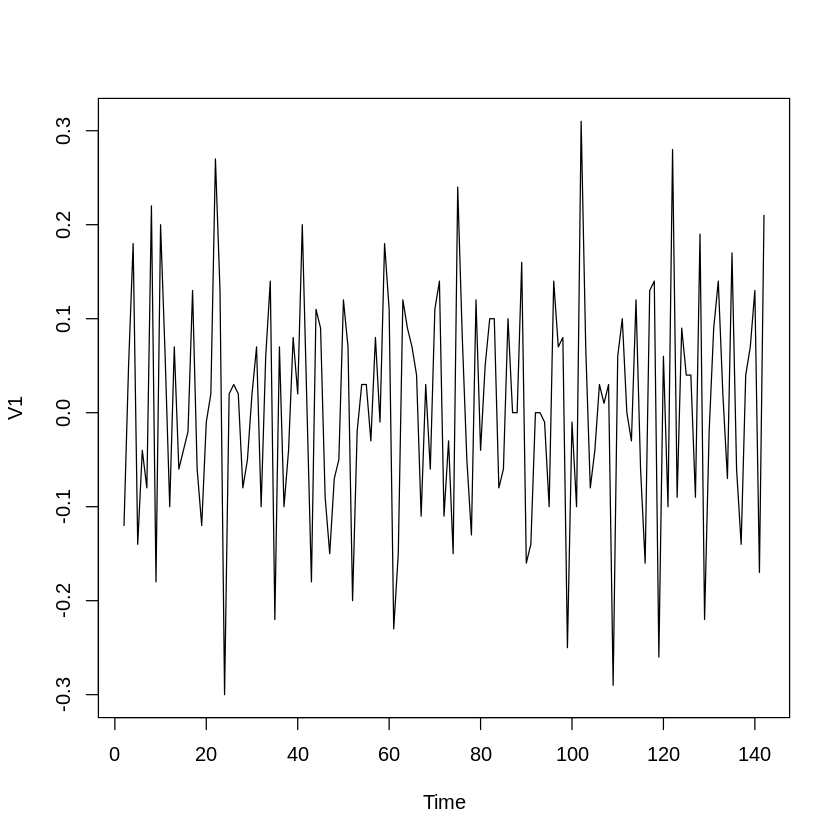

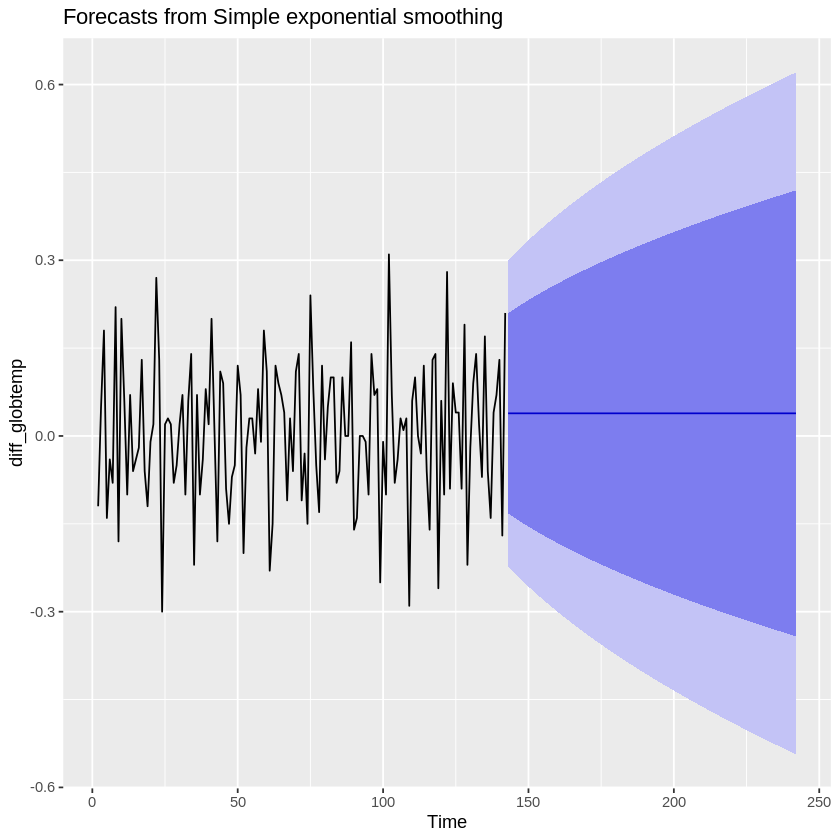

In [17]:
diff_globtemp <- diff(globtemp)
plot(diff_globtemp)
ses_diff_globtemp <- ses(diff_globtemp, alpha = .2, h = 100)
autoplot(ses_diff_globtemp)

3. Describa las bondades y limitaciones del modelo usado en los puntos anteriores.

```
Entre las bondades que uno puede encontrar, se tiene que le da mayor peso al pasado reciente y menos al pasado remoto, además, al hacer predicciones de un periodo de tiempo adelante, se puede decir que es bastante preciso.

El mayor problema del modelo es que no son precisos al momento de utilizar tendencias, y es por eso que uno debe remover estas para hacer una mejor predicción. Para esto se sugiere que, al graficar y evaluar la forma de la tendencia, utilizar un suavizamiento exponencial de mayor grado.
```

4. A partir de la serie original obtenga una serie sin tendencia.

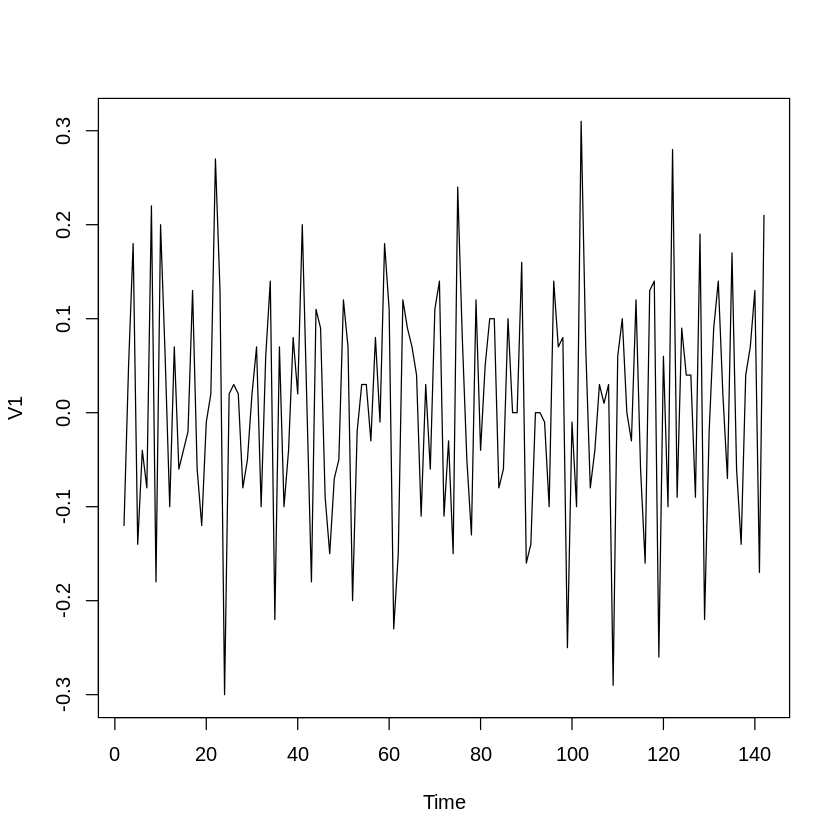

In [18]:
diff_globtemp = diff(globtemp)
plot(diff_globtemp)

5. Estime un modelo de regresión de la forma
$$Z_t = \beta_0 + \beta_1 t + \epsilon_t,$$
para la serie ```globtemp.dat```, donde $\epsilon_t$ es una colección de variables aleatorias no correlacionadas en media cero y varianza $\delta^2$. ¿El modelo ajustado luce similar a la serie original?

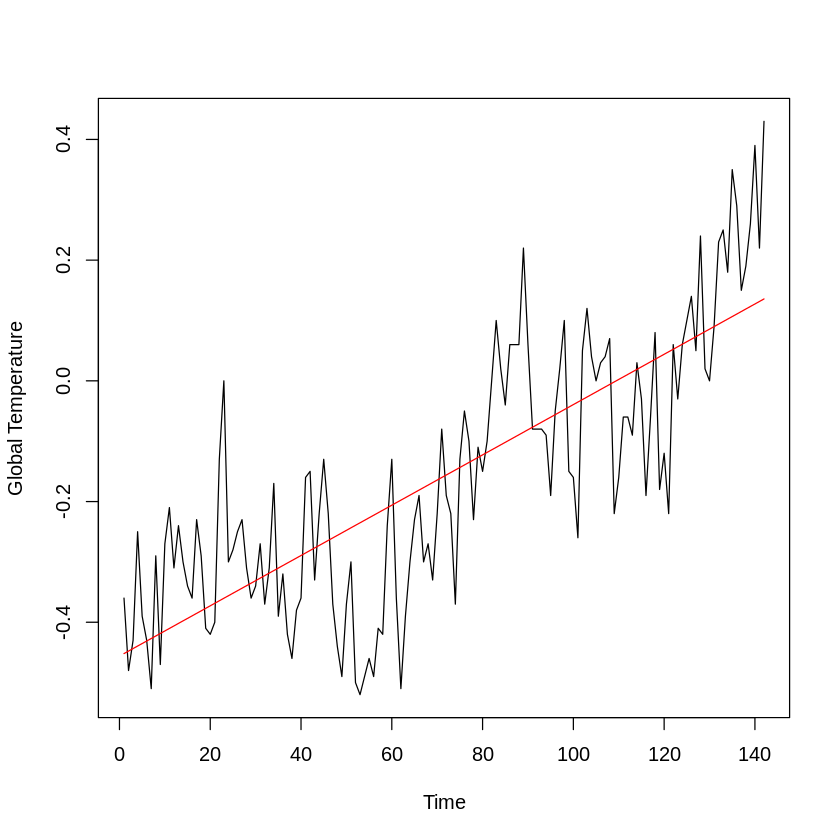

In [19]:
range <- ts(1:length(globtemp))
regression <- lm(globtemp ~ range)

intercept = regression$coefficients["(Intercept)"]
slope = regression$coefficients["range"]
trend <- intercept + slope * range

seqplot.ts(globtemp, trend, ylab="Global Temperature")

6. Descomponga la serie ```globtemp.dat``` en tres partes: una tendencia, una parte estacional y una componente residual. Describa que observa.

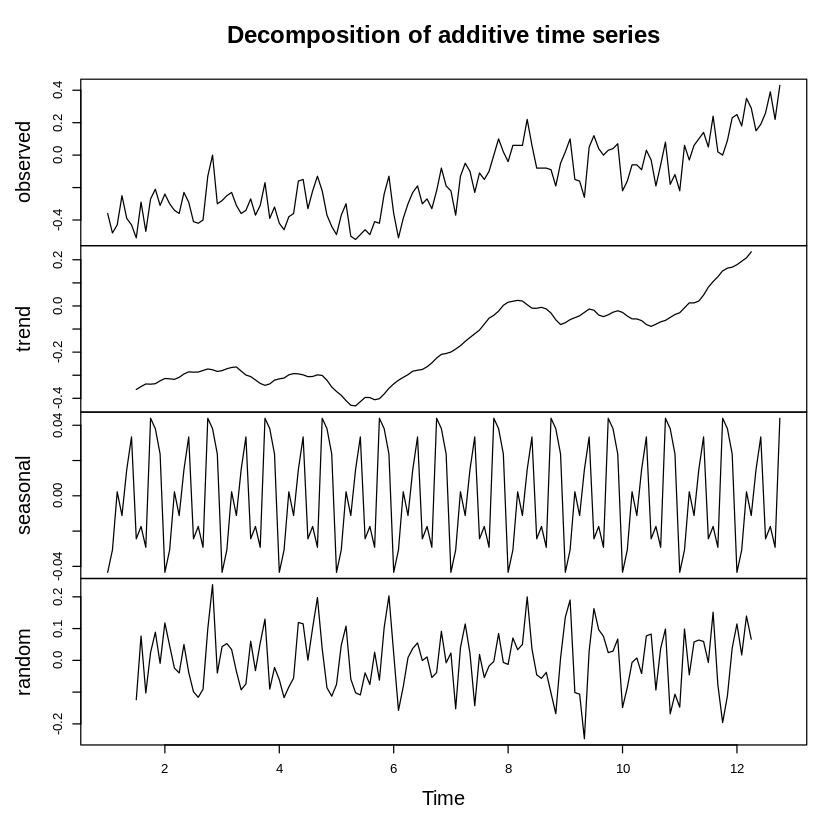

In [20]:
dec_globtemp <- ts(globtemp, frequency=12)
dec <- decompose(dec_globtemp)
plot(dec)

```
Podemos observar que los datos poseen una componente estacional notable, asi como la tendencia no se asemeja ni a una forma lineal ni parabólica, por lo que los modelos sugeridos pueden mejorarse.
```

---
Problema 3
---


Al analizar cierta serie de tiempo trimestral se usó un método ingenuo obteniéndose:

1. Ecuación de tendencia $T(t) = 84.65 + 4.71t$.
2. Serie de residuos $W(t) = Y(t) - Z(t)$.
| Trimestre | 1997   | 1998   | 1999   | 2000   | 2001 |   |   |   |   |
|:---------:|:------:|:------:|:------:|:------:|:----:|:---:|:---:|:---:|:---:|
| 1         | -      | 20     | 15     | 13.75  | 8.75 |   |   |   |   |
| 2         | -      | -6.25  | -7.50  | -7.50  | 2.50 |   |   |   |   |
| 3         | -11.25 | -11.25 | -21.50 | -13.75 | -    |   |   |   |   |
| 4         | 0.95   | 1.05   | 1.11   | 1.05   | -    |   |   |   |   |

En base a los resultados de 1. y 2., dado que $t = 1$ corresponde al primer trimestre de 1997, prediga los valores de la serie en cada uno de los trimestres de 2002.

**Solución.**

Primero obtendremos los valores de los $e_i$, con $i = 1,...,4$. Note que $e_i$ corresponde al promedio de los $W(t)$ de cada trimestre.
Calculando:

* $e_{1} = (20+15+13.75+8.75)/4 = 14.38$
* $e_2 = (-6.25-7.50-7.50+2.50)/4 = -4.69$
* $e_3 = (-11.25-11.25-21.50-13.75)/4 = -14.44$
* $e_4 = (0.95+1.05+1.11+1.05)/4 = 1.04$

Calculando el promedio de los $e_i$, para $i=1,...,4$

$$\overline{e} = (14.38-4.69-14.44+1.04)/4 = -0.93$$

Por otra parte la estimacion de la componente estacional, está dada por:

* $\hat{E_{1}} = e_1 - \overline{e} = 15.31$
* $\hat{E_{2}} = e_2 - \overline{e} = -3.76$
* $\hat{E_{3}} = e_3 - \overline{e} = -13.51$
* $\hat{E_{4}} = e_4 - \overline{e} = 1.97$

Note que la tendencia viene dada por $T_{t} = 84.65 +4.71*t$, y dado que nos piden predecir los valores de $Z$ para el año 2002, entonces tendremos que calcular los trimestres 21,22,23,24. En efecto:

* $\hat{T_{21}} = 183.56$
* $\hat{T_{22}} = 188.27$
* $\hat{T_{23}} = 192.98$
* $\hat{T_{24}} = 197.69$

Finalmente , calculando lo pedido (los valores de la serie para cada trimestre del año 2002).

* $\hat{Z_{21}} = \hat{T_{21}} + \hat{E_{1}} = 198.87$
* $\hat{Z_{22}} = \hat{T_{22}} + \hat{E_{2}} = 184.51$
* $\hat{Z_{23}} = \hat{T_{23}} + \hat{E_{3}} = 179.47$
* $\hat{Z_{24}} = \hat{T_{24}} + \hat{E_{4}} = 199.66$

---
Problema 4
---

Considere una serie de tiempo $\lbrace Z_t : t \in T \rbrace$ descrita por la ecuación:
$$Z_t = \beta_0 + \beta_1 t + \beta_2 t^2 + S_t + \epsilon_t$$
donde $\beta_0$, $\beta_1$ y $\beta_2$ son parámetros desconocidos del modelo, $S_t$ es un efecto estacional conocido y $\epsilon_t$ es un ruido aleatorio con media y varianza constante. Determine las ecuaciones que permiten estimar los parámetros $\beta_0$, $\beta_1$ y $\beta_2$.